In [1]:
%autosave 0
# this disables autosave for instructor solutions
# if a student makes changes to the instructor solutions then the instructor pushes updates this can cause a git conflict

Autosave disabled


# U.S. Census Project

In [1]:
!pip install census

In [2]:
# Dependencies
import requests
import pandas as pd
from census import Census

In [7]:
# Import U.S. Census API Key
from config import api_key
if api_key == "YOUR KEY HERE":
    print("Please edit your config.py file.")

# Create an instance of the Census library
c = Census(
    api_key
)


In [ ]:
pip install us

In [17]:
from us import states

In [19]:
c.acs5.tables()

[{'name': 'B17015',
  'description': 'Poverty Status in the Past 12 Months of Families by Family Type by Social Security Income by Supplemental Security Income (SSI) and Cash Public Assistance Income',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B17015.json',
  'universe ': 'Families'},
 {'name': 'B18104',
  'description': 'Sex by Age by Cognitive Difficulty',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B18104.json',
  'universe ': 'Civilian noninstitutionalized population 5 years and over'},
 {'name': 'B17016',
  'description': 'Poverty Status in the Past 12 Months of Families by Family Type by Work Experience of Householder and Spouse',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B17016.json',
  'universe ': 'Families'},
 {'name': 'B18105',
  'description': 'Sex by Age by Ambulatory Difficulty',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B18105.json',
  'universe ': 'Civilian noninstitutionalized populat

In [26]:
data = c.acs5.get(
    (
        'NAME',
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B25077_001E"
    ),
    {'for': 'state:{}'.format(states.MN.fips)}
)

In [43]:
region_states = [
    'OH',
    'IN',
    'IL',
    'MI',
    'WI',
    'MN',
    'IA',
    'MS',
    'ND',
    'SD',
    'NE',
    'KS'
]
data_years = [
    2018,
    2019,
    2020,
    2021,
    2022
]
    

In [64]:
c.acs5.state(
    (
        'NAME',
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B25077_001E"
    ), states.MN.fips, year=2018)

[{'NAME': 'Minnesota',
  'B19013_001E': 68411.0,
  'B01003_001E': 5527358.0,
  'B01002_001E': 37.9,
  'B19301_001E': 36245.0,
  'B17001_002E': 547442.0,
  'B25077_001E': 211800.0,
  'state': '27'}]

In [65]:
census_data = []
for data_year in data_years:
    for state in region_states:
        state_data = c.acs5.get(
            (
                'NAME',
                "B19013_001E",
                "B01003_001E",
                "B01002_001E",
                "B19301_001E",
                "B17001_002E",
                "B25077_001E"
            ),
            {'for': 'state:{}'.format(states.lookup(state).fips)},
            year=data_year
        )[0]
        state_data["Year"] = data_year
        census_data.append(state_data)
census_data

[{'NAME': 'Ohio',
  'B19013_001E': 54533.0,
  'B01003_001E': 11641879.0,
  'B01002_001E': 39.3,
  'B19301_001E': 30304.0,
  'B17001_002E': 1645986.0,
  'B25077_001E': 140000.0,
  'state': '39',
  'Year': 2018},
 {'NAME': 'Indiana',
  'B19013_001E': 54325.0,
  'B01003_001E': 6637426.0,
  'B01002_001E': 37.6,
  'B19301_001E': 28461.0,
  'B17001_002E': 908359.0,
  'B25077_001E': 135400.0,
  'state': '18',
  'Year': 2018},
 {'NAME': 'Illinois',
  'B19013_001E': 63575.0,
  'B01003_001E': 12821497.0,
  'B01002_001E': 37.9,
  'B19301_001E': 34463.0,
  'B17001_002E': 1635603.0,
  'B25077_001E': 187200.0,
  'state': '17',
  'Year': 2018},
 {'NAME': 'Michigan',
  'B19013_001E': 54938.0,
  'B01003_001E': 9957488.0,
  'B01002_001E': 39.7,
  'B19301_001E': 30336.0,
  'B17001_002E': 1457008.0,
  'B25077_001E': 146200.0,
  'state': '26',
  'Year': 2018},
 {'NAME': 'Wisconsin',
  'B19013_001E': 59209.0,
  'B01003_001E': 5778394.0,
  'B01002_001E': 39.3,
  'B19301_001E': 32018.0,
  'B17001_002E': 66822

## Retrieve data from the U.S. Census using the Census library

References:

* Review the following page to review the Python library documentation: <https://github.com/CommerceDataService/census-wrapper>

* Review the following page to learn more about the data labels: <https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b>

In [66]:
# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column renaming
census_pd = census_pd.rename(
    columns = {
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "B25077_001E": "Home Value",
        "NAME": "State"
    }
)

# Add a Poverty Rate column (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Configure the final DataFrame
census_pd = census_pd[
    [
        "State",
        "Year",
        "Population",
        "Median Age",
        "Household Income",
        "Home Value",
        "Per Capita Income",
        "Poverty Count",
        "Poverty Rate"
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd)}")
census_pd.head()

Number of rows in the DataFrame: 60


,State,Year,Population,Median Age,Household Income,Home Value,Per Capita Income,Poverty Count,Poverty Rate
0,Ohio,2018,11641879.0,39.3,54533.0,140000.0,30304.0,1645986.0,14.138491
1,Indiana,2018,6637426.0,37.6,54325.0,135400.0,28461.0,908359.0,13.685411
2,Illinois,2018,12821497.0,37.9,63575.0,187200.0,34463.0,1635603.0,12.756724
3,Michigan,2018,9957488.0,39.7,54938.0,146200.0,30336.0,1457008.0,14.632285
4,Wisconsin,2018,5778394.0,39.3,59209.0,173600.0,32018.0,668220.0,11.564113


In [67]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
census_pd.to_csv("census_data.csv", encoding="utf-8", index=False)

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress

In [68]:
labels = []
medians = []
for data_year in data_years:
    labels.append(str(data_year))
    medians.append(census_pd.loc[census_pd["Year"] == data_year]["Household Income"].median())

medians

[58001.0, 60060.0, 61463.5, 64975.0, 70159.0]

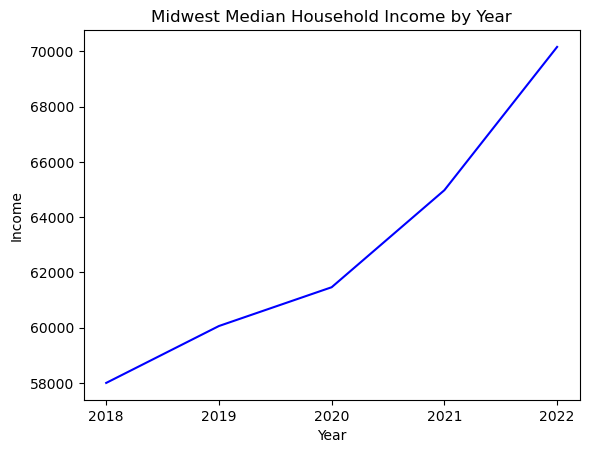

In [58]:
plt.plot(labels, medians, "b-")

# Incorporate the other graph properties
plt.title('Midwest Median Household Income by Year')
plt.xlabel('Year')
plt.ylabel('Income')

# Show plot
plt.show()

In [61]:
def regressValues(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    return regress_values

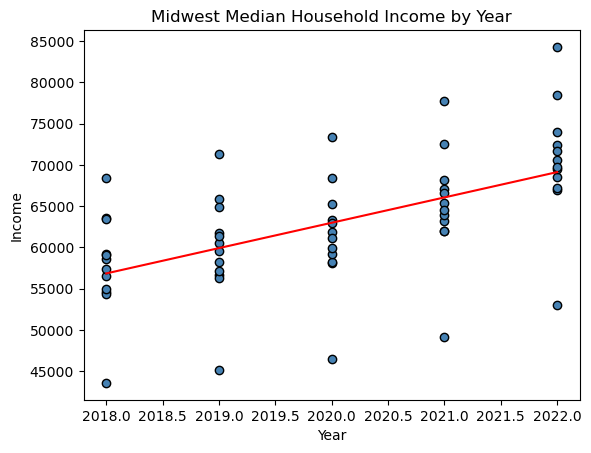

In [62]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Household Income"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Household Income"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Midwest Median Household Income by Year')
plt.xlabel('Year')
plt.ylabel('Income')

# Show plot
plt.show()

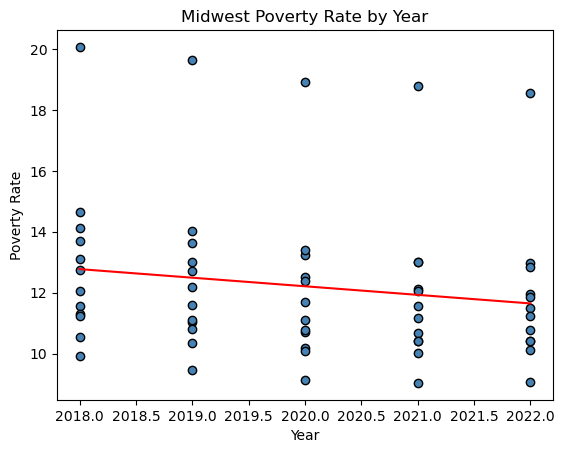

In [63]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Poverty Rate"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Poverty Rate"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Midwest Poverty Rate by Year')
plt.xlabel('Year')
plt.ylabel('Poverty Rate')

# Show plot
plt.show()

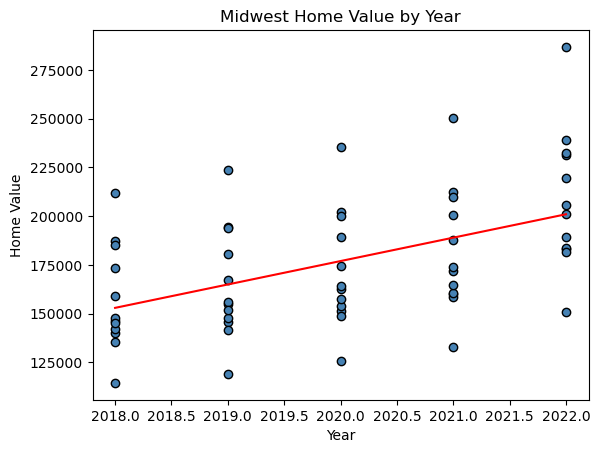

In [69]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Home Value"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Home Value"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Midwest Home Value by Year')
plt.xlabel('Year')
plt.ylabel('Home Value')

# Show plot
plt.show()